<a href="https://colab.research.google.com/github/kblandonv/Microproyecto4IA/blob/main/Equipo6_Microproyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flower Recognition CNN Keras




In [ ]:
# Descomprimir el archivo 'archive.zip' en un directorio llamado 'flowers'

!unzip archive.zip -d flowers

Archive:  archive.zip
  inflating: flowers/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/flowers/daisy/10555749515_13a12a026e.jpg  
  inflati

In [ ]:
import os
print(os.listdir('flowers/flowers'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


## CONTENTS ::

[ **1 ) Importing Various Modules**](#content1)

[ **2 ) Preparing the Data**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Evaluating the Model Performance**](#content4)

[ **5 ) Visualizing Predictons on the Validation Set**](#content5)

<a id="content1"></a>
## 1 ) Importing Various Modules.

In [ ]:
# Ignorar advertencias
import warnings
warnings.filterwarnings('always')  # Mostrar advertencias siempre
warnings.filterwarnings('ignore')   # Ignorar las advertencias para mantener el código más limpio

# Importación de bibliotecas para visualización de datos y manipulación
import numpy as np                   # Biblioteca para trabajar con matrices y operaciones numéricas
import pandas as pd                  # Biblioteca para manipulación y análisis de datos
import matplotlib.pyplot as plt       # Biblioteca para gráficos y visualización
from matplotlib import style          # Estilo para gráficos
import seaborn as sns                 # Biblioteca para visualización de datos

# Configuración de visualización
%matplotlib inline                    # Mostrar gráficos en línea dentro del notebook
style.use('fivethirtyeight')           # Aplicar estilo 'fivethirtyeight' a los gráficos
sns.set(style='whitegrid', color_codes=True)  # Configurar estilo predeterminado de seaborn

# Importación de bibliotecas de selección de modelos y métricas
from sklearn.model_selection import train_test_split  # División del conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import KFold             # Validación cruzada con K-fold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV      # Búsqueda de hiperparámetros mediante validación cruzada
from sklearn.preprocessing import LabelEncoder        # Codificación de etiquetas categóricas en enteros

# Preprocesamiento de imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Aumento de imágenes (rotaciones, zoom, etc.)

# Importación de bibliotecas de deep learning
from keras import backend as K        # Backend para operaciones con tensores
from keras.models import Sequential   # API secuencial de Keras para construir el modelo
from keras.layers import Dense        # Capa densa totalmente conectada
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop  # Optimización de modelos
from keras.utils import to_categorical  # Conversión de etiquetas en formato de categorías para la clasificación

# Importación de capas específicas para redes neuronales convolucionales (CNN)
from keras.layers import Dropout, Flatten, Activation       # Capas comunes en redes CNN
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization  # Capas específicas de CNN (convolución, pooling, normalización)

# Otras importaciones necesarias
import tensorflow as tf            # Biblioteca principal para deep learning
import random as rn                # Para generar números aleatorios
import cv2                         # Para leer y manipular imágenes
from tqdm import tqdm              # Barra de progreso para bucles
import os                          # Biblioteca para manejar operaciones del sistema de archivos
from random import shuffle         # Para mezclar datos de manera aleatoria
from zipfile import ZipFile        # Para trabajar con archivos zip
from PIL import Image              # Para manejar y procesar imágenes

<a id="content2"></a>
## 2 ) Preparing the Data

## 2.1) Making the functions to get the training and validation set from the Images

In [ ]:
# Preparación de listas para almacenar los datos de las imágenes
X = []  # Almacenará las imágenes (en formato de array)
Z = []  # Almacenará las etiquetas (el tipo de flor)

# Definir tamaño de las imágenes a procesar
IMG_SIZE = 150  # Tamaño de 150x150 píxeles

# Definir rutas de directorios para cada tipo de flor
FLOWER_DAISY_DIR = 'flowers/flowers/daisy'
FLOWER_SUNFLOWER_DIR = 'flowers/flowers/sunflower'
FLOWER_TULIP_DIR = 'flowers/flowers/tulip'
FLOWER_DANDI_DIR = 'flowers/flowers/dandelion'
FLOWER_ROSE_DIR = 'flowers/flowers/rose'

In [ ]:
def assign_label(img, flower_type):
    """
    Asigna una etiqueta a una imagen específica.

    Args:
    img (str): El nombre o ruta de la imagen (aunque actualmente no se usa).
    flower_type (str): El tipo de flor que representa la imagen.

    Returns:
    str: La etiqueta que indica el tipo de flor.
    """
    return flower_type  # Devuelve el tipo de flor como la etiqueta para la imagen.


In [ ]:
def make_train_data(flower_type, DIR):
    """
    Procesa las imágenes en el directorio especificado, las redimensiona y les asigna etiquetas.

    Args:
    flower_type (str): El tipo de flor (etiqueta) que se asignará a las imágenes.
    DIR (str): El directorio que contiene las imágenes de un tipo específico de flor.

    Returns:
    None: Los resultados se almacenan en las listas globales X (imágenes) y Z (etiquetas).
    """
    # Itera sobre cada archivo en el directorio especificado
    for img in tqdm(os.listdir(DIR)):
        # Asigna la etiqueta correspondiente al tipo de flor
        label = assign_label(img, flower_type)

        # Construye la ruta completa de la imagen
        path = os.path.join(DIR, img)

        # Lee la imagen en color (cv2.IMREAD_COLOR) usando OpenCV
        img = cv2.imread(path, cv2.IMREAD_COLOR)

        # Redimensiona la imagen a un tamaño fijo (IMG_SIZE x IMG_SIZE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Convierte la imagen en un array de NumPy y la añade a la lista global X
        X.append(np.array(img))

        # Añade la etiqueta (tipo de flor) a la lista global Z
        Z.append(str(label))


In [ ]:
# Procesar las imágenes de margaritas y añadirlas a las listas X y Z
make_train_data('Daisy', FLOWER_DAISY_DIR)

# Imprimir la cantidad de imágenes procesadas
print(len(X))


100%|██████████| 764/764 [00:01<00:00, 509.50it/s]

764


In [ ]:
# Procesar las imágenes de girasoles y añadirlas a las listas X y Z
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)

# Imprimir la cantidad total de imágenes procesadas
print(len(X))


100%|██████████| 733/733 [00:01<00:00, 396.83it/s]

1497


In [ ]:
# Procesar las imágenes de tulipanes y añadirlas a las listas X y Z
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))  # Imprime el total de imágenes hasta ahora

100%|██████████| 984/984 [00:02<00:00, 403.56it/s]

2481


In [ ]:
# Procesar las imágenes de dientes de león y añadirlas a las listas X y Z
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))  # Imprime el total de imágenes tras añadir las de diente de león

100%|██████████| 1052/1052 [00:02<00:00, 508.84it/s]

3533


In [ ]:
# Procesar las imágenes de rosas y añadirlas a las listas X y Z
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))  # Imprime el total de imágenes tras añadir las de rosas

100%|██████████| 784/784 [00:01<00:00, 536.56it/s]

4317


## 2.2 ) Visualizing some Random Images

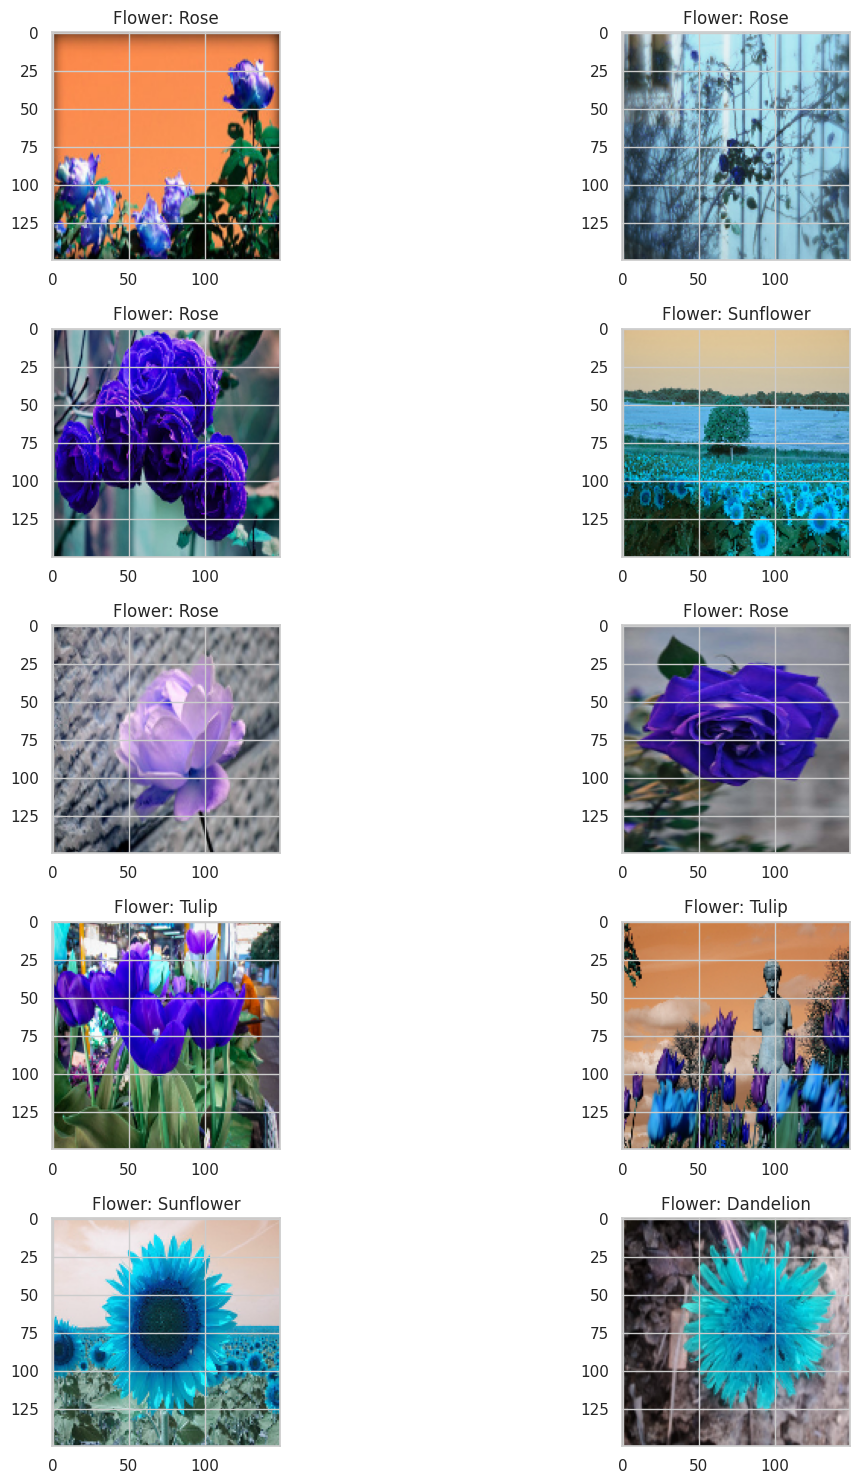

In [ ]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

# Visualizar 10 imágenes aleatorias
for i in range(5):
    for j in range(2):
        l = rn.randint(0, len(Z))  # Selecciona un índice aleatorio
        ax[i, j].imshow(X[l])  # Muestra la imagen correspondiente
        ax[i, j].set_title('Flower: ' + Z[l])  # Título con la etiqueta de la flor

plt.tight_layout()


## 2.3 ) Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Z)  # Convierte las etiquetas en números enteros
Y = to_categorical(Y, 5)  # Convierte las etiquetas en formato one-hot

X = np.array(X)  # Convierte la lista de imágenes en un array de NumPy
X = X / 255  # Normaliza los valores de los píxeles a [0, 1]


## 2.4 ) Splitting into Training and Validation Sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


## 2.5 ) Setting the Random Seeds

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


<a id="content3"></a>
## 3 ) Modelling

## 3.1 ) Building the ConvNet Model

In [ ]:
# Crear el modelo CNN secuencial
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Tercera capa convolucional
model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Cuarta capa convolucional
model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Aplanamiento (Flatten) para pasar a capas completamente conectadas
model.add(Flatten())

# Capa densa completamente conectada con 512 neuronas
model.add(Dense(512))
model.add(Activation('relu'))  # Activación ReLU

# Capa de salida con 5 neuronas (una por cada tipo de flor) con activación softmax
model.add(Dense(5, activation='softmax'))


## 3.2 ) Using a LR Annealer

In [ ]:
# Definir los hiperparámetros de entrenamiento
batch_size = 128  # Tamaño del lote de imágenes que se procesarán en cada iteración
epochs = 50       # Número de veces que el modelo pasará por todo el conjunto de datos de entrenamiento

# Importar el callback ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Callback que reduce la tasa de aprendizaje si no mejora la precisión de validación después de 3 épocas
red_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.1)

## 3.3 ) Data Augmentation to prevent Overfitting

In [ ]:
# Creación de un generador de imágenes con aumentación de datos (Data Augmentation)
datagen = ImageDataGenerator(
        featurewise_center=False,  # No centra los datos de entrada a 0 (en todo el dataset)
        samplewise_center=False,   # No centra los datos de cada muestra a 0
        featurewise_std_normalization=False,  # No normaliza por la desviación estándar del dataset
        samplewise_std_normalization=False,   # No normaliza cada muestra por su desviación estándar
        zca_whitening=False,  # No aplica blanqueamiento ZCA a las imágenes
        rotation_range=10,    # Rota aleatoriamente las imágenes en un rango de 0 a 10 grados
        zoom_range=0.1,       # Aplica un zoom aleatorio de hasta un 10%
        width_shift_range=0.2,  # Desplaza aleatoriamente las imágenes horizontalmente en un 20% del ancho
        height_shift_range=0.2, # Desplaza aleatoriamente las imágenes verticalmente en un 20% del alto
        horizontal_flip=True,  # Invierte las imágenes horizontalmente de manera aleatoria
        vertical_flip=False)   # No invierte las imágenes verticalmente

# Ajuste del generador de datos en el conjunto de entrenamiento
datagen.fit(x_train)

## 3.4 ) Compiling the Keras Model & Summary

In [ ]:
# Importar el optimizador Adam
from tensorflow.keras.optimizers import Adam

# Compilar el modelo
# Usamos Adam con una tasa de aprendizaje inicial de 0.001, y la función de pérdida 'categorical_crossentropy'
# para un problema de clasificación multiclase, y la métrica de precisión
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Mostrar un resumen de la arquitectura del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [ ]:
# Callbacks adicionales
CB = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)
]
# EarlyStopping detendrá el entrenamiento si la precisión de validación no mejora después de 5 épocas consecutivas,
# restaurando los mejores pesos obtenidos durante el entrenamiento.

# Entrenamiento del modelo usando el generador de imágenes (con aumentación de datos) y EarlyStopping
History = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs, callbacks=CB, validation_data=(x_test, y_test),
                    verbose=1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 669ms/step - accuracy: 0.2851 - loss: 1.5597 - val_accuracy: 0.3963 - val_loss: 1.2957
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3906 - loss: 1.3334 - val_accuracy: 0.4657 - val_loss: 1.2711
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 536ms/step - accuracy: 0.4788 - loss: 1.2090 - val_accuracy: 0.5509 - val_loss: 1.1139
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4595 - loss: 1.1713 - val_accuracy: 0.5574 - val_loss: 1.1105
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 524ms/step - accuracy: 0.5560 - loss: 1.0924 - val_accuracy: 0.6139 - val_loss: 1.0261
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5859 - loss: 1.0716 - val_accuracy: 0.5954 - val_loss: 1.0269
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 555ms/step - accuracy: 0.6146 - loss: 0.9870 - val_accuracy: 0.6241 - val_loss: 1.0028
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6328 - loss: 0.9173 - val_accuracy: 0.

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

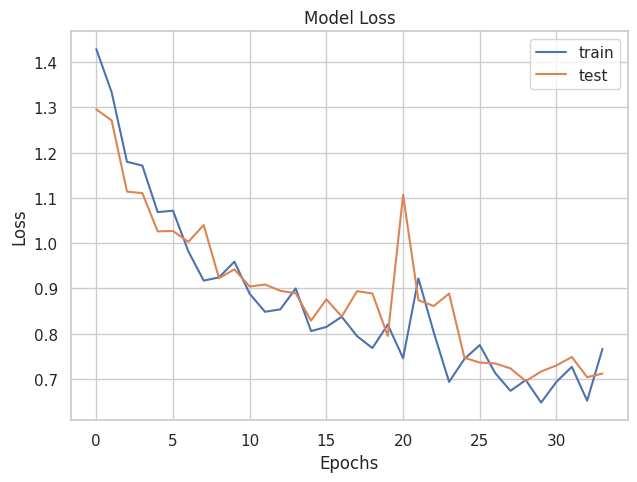

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(History.history['loss'])  # Pérdida del conjunto de entrenamiento
plt.plot(History.history['val_loss'])  # Pérdida del conjunto de validación
plt.title('Model Loss')  # Título del gráfico
plt.ylabel('Loss')  # Etiqueta del eje Y
plt.xlabel('Epochs')  # Etiqueta del eje X
plt.legend(['train', 'test'])  # Leyenda para distinguir entre entrenamiento y validación
plt.show()  # Mostrar el gráfico

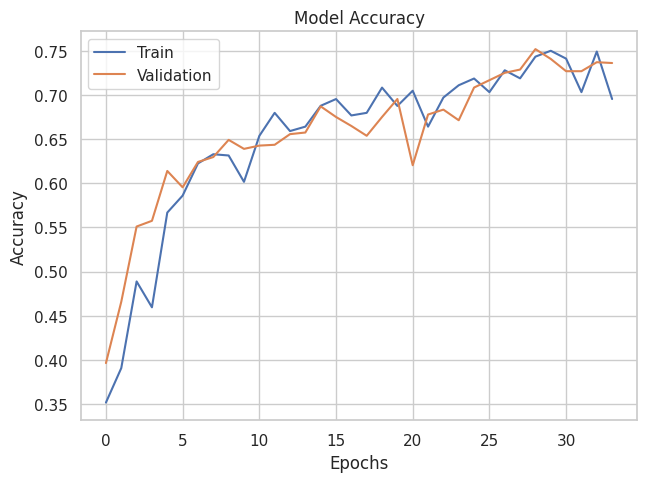

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(History.history['accuracy'])  # Precisión del conjunto de entrenamiento
plt.plot(History.history['val_accuracy'])  # Precisión del conjunto de validación
plt.title('Model Accuracy')  # Título del gráfico
plt.ylabel('Accuracy')  # Etiqueta del eje Y
plt.xlabel('Epochs')  # Etiqueta del eje X
plt.legend(['Train', 'Validation'], loc='upper left')  # Leyenda para distinguir entre entrenamiento y validación
plt.show()  # Mostrar el gráfico

<a id="content5"></a>
## 5 ) Visualizing Predictons on the Validation Set

In [ ]:
# Obtener predicciones sobre el conjunto de validación
pred = model.predict(x_test)  # Predicciones del modelo en el conjunto de test
pred_digits = np.argmax(pred, axis=1)  # Obtener las clases predichas (índices de las clases)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
# Almacenar índices de clases correctamente clasificadas y mal clasificadas
i = 0
prop_class = []  # Lista para almacenar índices de clases correctamente clasificadas
mis_class = []  # Lista para almacenar índices de clases mal clasificadas

# Recorriendo las etiquetas verdaderas y predicciones para identificar clasificaciones correctas
for i in range(len(y_test)):
    if np.argmax(y_test[i]) == pred_digits[i]:  # Comprobar si la predicción es correcta
        prop_class.append(i)  # Agregar índice a la lista de correctas
    if len(prop_class) == 8:  # Limitar a 8 ejemplos correctamente clasificados
        break

i = 0
# Recorriendo las etiquetas verdaderas y predicciones para identificar clasificaciones incorrectas
for i in range(len(y_test)):
    if not np.argmax(y_test[i]) == pred_digits[i]:  # Comprobar si la predicción es incorrecta
        mis_class.append(i)  # Agregar índice a la lista de incorrectas
    if len(mis_class) == 8:  # Limitar a 8 ejemplos mal clasificados
        break

confusion matrix

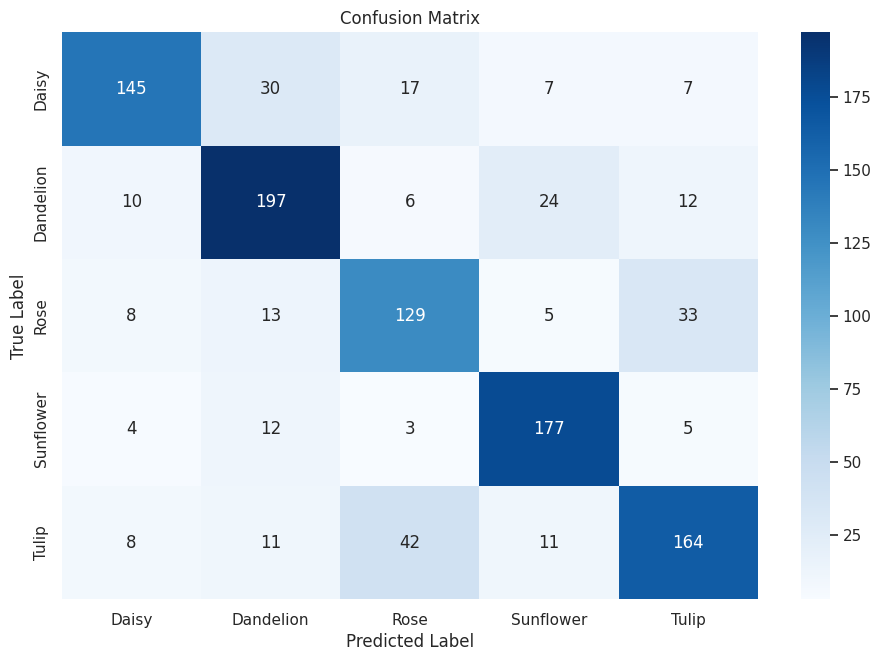

In [ ]:
from sklearn.metrics import confusion_matrix  # Importar matriz de confusión
import seaborn as sns  # Importar seaborn para visualización

# Obtener las etiquetas reales y predichas
y_true = np.argmax(y_test, axis=1)  # Etiquetas reales (convertir de one-hot a índices)
y_pred = pred_digits  # Etiquetas predichas por el modelo

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)  # Matriz de confusión

# Configurar el gráfico para la matriz de confusión
plt.figure(figsize=(10, 7))  # Definir el tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
# Graficar la matriz de confusión usando seaborn, mostrando los conteos

# Agregar títulos y etiquetas a los ejes
plt.title('Confusion Matrix')  # Título del gráfico
plt.xlabel('Predicted Label')  # Etiqueta del eje X
plt.ylabel('True Label')  # Etiqueta del eje Y

# Mostrar el gráfico de la matriz de confusión
plt.show()

#### CORRECTLY CLASSIFIED FLOWER IMAGES

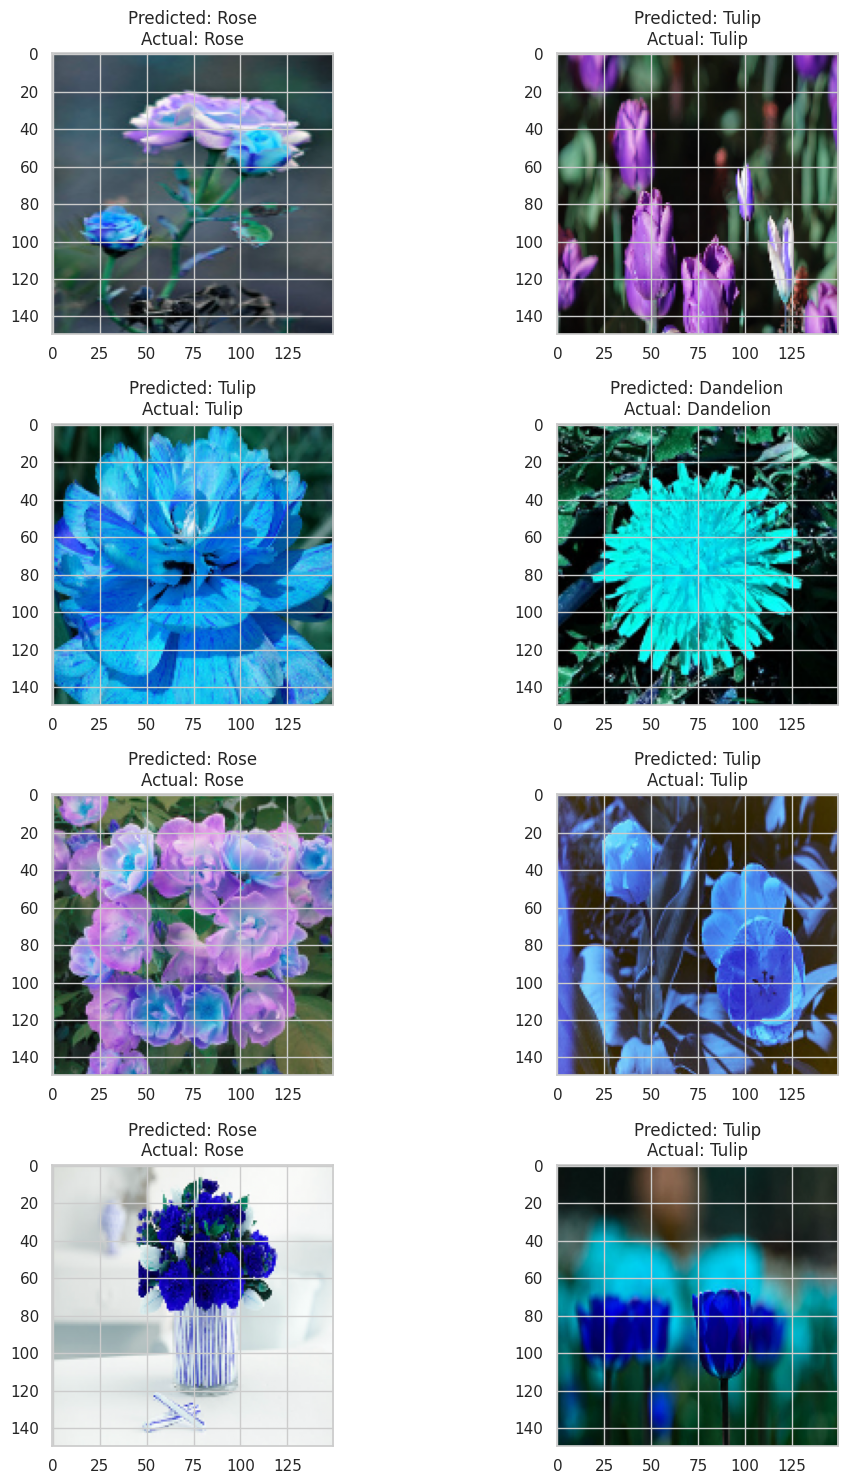

In [ ]:
import warnings  # Importar librería para manejar advertencias
import numpy as np  # Importar numpy para operaciones numéricas
import matplotlib.pyplot as plt  # Importar matplotlib para visualización

# Ignorar advertencias
warnings.filterwarnings('always')  # Mostrar siempre las advertencias
warnings.filterwarnings('ignore')  # Ignorar advertencias

# Inicializar contador para indexar las imágenes
count = 0

# Crear una figura con subplots de 4 filas y 2 columnas
fig, ax = plt.subplots(4, 2)  # Crear subplots
fig.set_size_inches(15, 15)  # Ajustar el tamaño de la figura

# Recorrer las filas y columnas de la figura para mostrar imágenes
for i in range(4):
    for j in range(2):
        # Mostrar la imagen en la posición [i, j] usando el índice de la clase correctamente clasificada
        ax[i, j].imshow(x_test[prop_class[count]])

        # Obtener las clases predichas y reales
        predicted_label = le.inverse_transform([pred_digits[prop_class[count]]])[0]  # Etiqueta predicha
        actual_label = le.inverse_transform([np.argmax(y_test[prop_class[count]])])[0]  # Etiqueta real

        # Establecer el título con la predicción y la etiqueta real
        ax[i, j].set_title(f"Predicted: {predicted_label}\nActual: {actual_label}")

        # Ajustar el espaciado para que no se superpongan los elementos en el gráfico
        plt.tight_layout()

        # Incrementar el contador para la siguiente imagen
        count += 1

# Mostrar la figura con las imágenes y las predicciones
plt.show()  # Mostrar la visualización

#### MISCLASSIFIED IMAGES OF FLOWERS

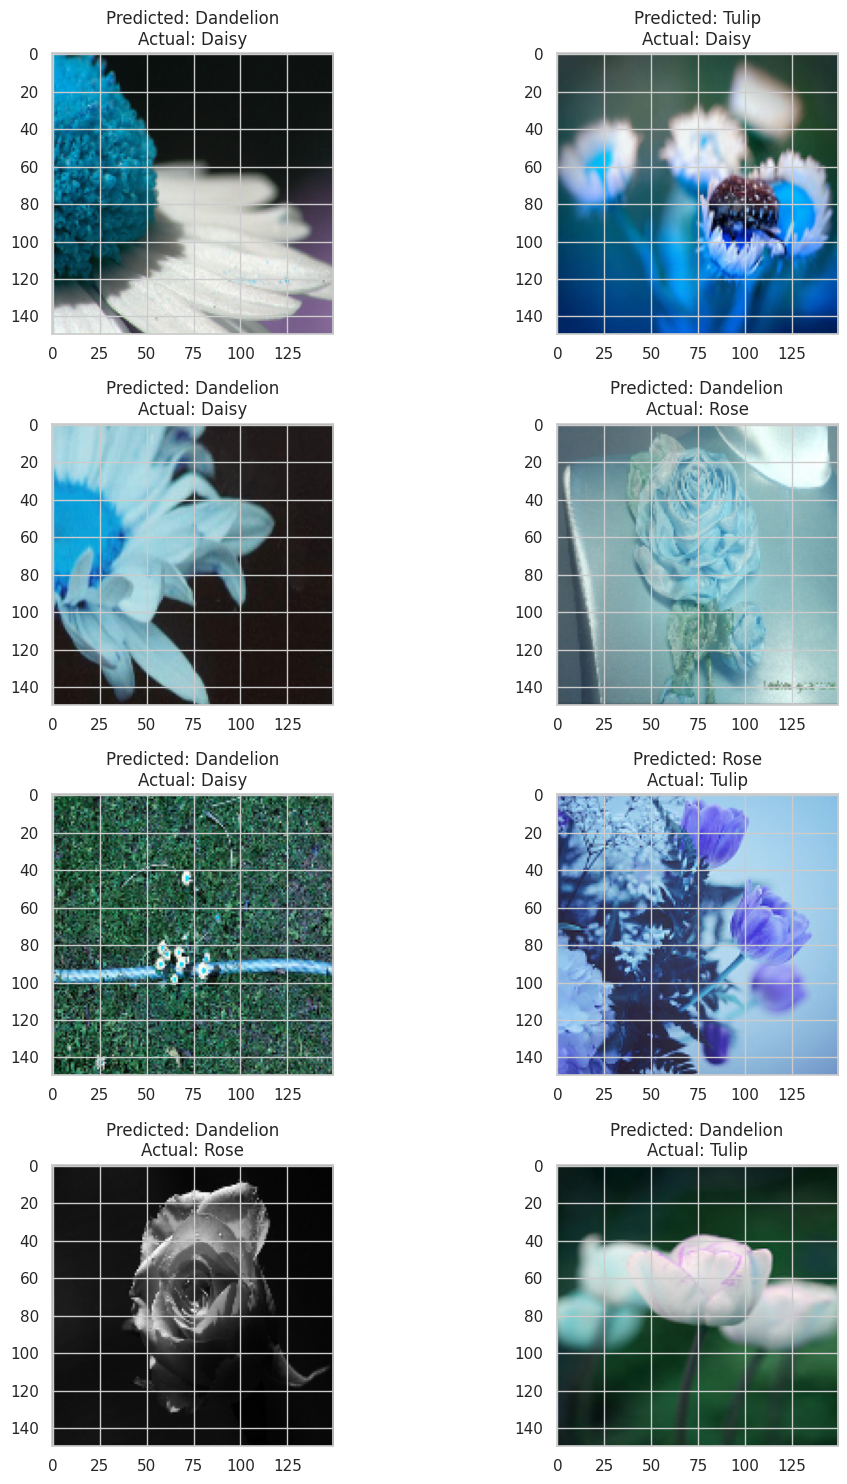

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

# Ignorar advertencias
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Inicializar contador
count = 0
# Crear una figura con subplots de 4 filas y 2 columnas
fig, ax = plt.subplots(4, 2)  # Crear subplots
fig.set_size_inches(15, 15)  # Ajustar el tamaño de la figura

# Recorrer las filas y columnas de la figura para mostrar imágenes mal clasificadas
for i in range(4):
    for j in range(2):
        # Mostrar la imagen en la posición [i, j] usando el índice de la clase mal clasificada
        ax[i, j].imshow(x_test[mis_class[count]])

        # Obtener las clases predichas y reales
        predicted_label = le.inverse_transform([pred_digits[mis_class[count]]])[0]  # Etiqueta predicha
        actual_label = le.inverse_transform([np.argmax(y_test[mis_class[count]])])[0]  # Etiqueta real

        # Establecer el título con la predicción y la etiqueta real
        ax[i, j].set_title(f"Predicted: {predicted_label}\nActual: {actual_label}")

        # Ajustar el espaciado para que no se superpongan los elementos en el gráfico
        plt.tight_layout()

        # Incrementar el contador para la siguiente imagen
        count += 1

# Mostrar la figura con las imágenes y las predicciones mal clasificadas
plt.show()  # Mostrar la visualización


# TRANSFERT LEARNING

In [ ]:
!pip install mlxtend


In [ ]:
import numpy as np  # Importar librería para operaciones numéricas
import pandas as pd  # Importar librería para manipulación de datos

import os  # Para operaciones con el sistema de archivos
import random  # Para generar números aleatorios
from operator import itemgetter  # Para obtener elementos de forma ordenada
import copy  # Para copiar objetos
import time  # Para manejar tiempo

# Importar PyTorch y librerías relacionadas
import torch  # Librería principal de PyTorch
import torchvision  # Librería para visión por computadora en PyTorch
import torchvision.transforms as transform  # Transformaciones de datos
from torchvision.datasets import ImageFolder  # Para cargar conjuntos de imágenes
from torch.utils.data import DataLoader, Dataset, ConcatDataset  # Para manejar conjuntos de datos
import torch.nn as nn  # Para construir redes neuronales
import torchvision.models as models  # Modelos preentrenados
from torchvision.utils import make_grid  # Para crear cuadrículas de imágenes
import torch.nn.functional as F  # Funciones adicionales para redes neuronales

# Importar librerías para evaluación y visualización
from mlxtend.plotting import plot_confusion_matrix  # Para graficar matrices de confusión
from sklearn.metrics import confusion_matrix, classification_report  # Para métricas de evaluación

import matplotlib.pyplot as plt  # Para visualización de datos
import matplotlib.image as mpimg  # Para manejar imágenes
from matplotlib.image import imread  # Para leer imágenes
import seaborn as sns  # Para visualizaciones atractivas

from sklearn.model_selection import train_test_split  # Para dividir conjuntos de datos

import warnings  # Para manejar advertencias
warnings.filterwarnings('ignore')  # Ignorar advertencias

# Configurar dispositivo para usar GPU si está disponible
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Definir la ruta donde están almacenadas las imágenes
path = 'flowers/flowers'

In [ ]:
# Definir transformaciones para los diferentes conjuntos de datos
transformer = {
    'original': transform.Compose([
        transform.Resize((220, 220)),  # Redimensionar imágenes a 220x220
        transform.ToTensor(),  # Convertir imágenes a tensores
        transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178),  # Normalizar
                            (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
    ]),
    'dataset1': transform.Compose([
        transform.Resize((220, 220)),  # Redimensionar
        transform.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Aumentar datos
        transform.RandomRotation(5),  # Rotar aleatoriamente
        transform.RandomAffine(degrees=11, translate=(0.1, 0.1), scale=(0.8, 0.8)),  # Transformación afín
        transform.ToTensor(),
        transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178),
                            (0.3268945515155792, 0.29282665252685547, 0.29053378105163574)),
    ]),
    'dataset2': transform.Compose([
        transform.Resize((220, 220)),
        transform.RandomHorizontalFlip(),  # Voltear horizontalmente
        transform.RandomRotation(10),  # Rotar
        transform.RandomAffine(translate=(0.05, 0.05), degrees=0),  # Transformación afín
        transform.ToTensor(),
        transform.RandomErasing(inplace=True, scale=(0.01, 0.23)),  # Borrado aleatorio
        transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178),
                            (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
    ]),
    'dataset3': transform.Compose([
        transform.Resize((220, 220)),
        transform.RandomHorizontalFlip(p=0.5),  # Voltear horizontalmente con probabilidad 0.5
        transform.RandomRotation(15),  # Rotar
        transform.RandomAffine(translate=(0.08, 0.1), degrees=15),  # Transformación afín
        transform.ToTensor(),
        transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178),
                            (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
    ])
}

In [ ]:

# Definir tamaño de lote
bs = 50

# Cargar el conjunto original de imágenes
original = ImageFolder(path, transform=transformer['original'])

# Dividir el conjunto original en entrenamiento/validación y prueba
train_val, test = train_test_split(original, test_size=0.2, shuffle=True, random_state=43)

# Concatenar el conjunto de entrenamiento/validación con versiones aumentadas
train_val = ConcatDataset([
    train_val,
    ImageFolder(path, transform=transformer['dataset1']),
    ImageFolder(path, transform=transformer['dataset2']),
    ImageFolder(path, transform=transformer['dataset3'])
])

# Dividir el conjunto de entrenamiento/validación en entrenamiento y validación
train, val = train_test_split(train_val, test_size=0.1, shuffle=True, random_state=43)

# Crear DataLoaders para cada conjunto
loaders = {
    'train': DataLoader(train, batch_size=bs, num_workers=4, pin_memory=True),
    'val': DataLoader(val, batch_size=bs, num_workers=4, pin_memory=True),
    'test': DataLoader(test, batch_size=bs, num_workers=4, pin_memory=True)
}

# Almacenar tamaños de los conjuntos
dataset_sizes = {
    'train': len(train),
    'val': len(val),
    'test': len(test),
}


In [ ]:

# Verificar si la GPU está disponible
import torch
print(torch.cuda.is_available())  # True si la GPU está disponible


True


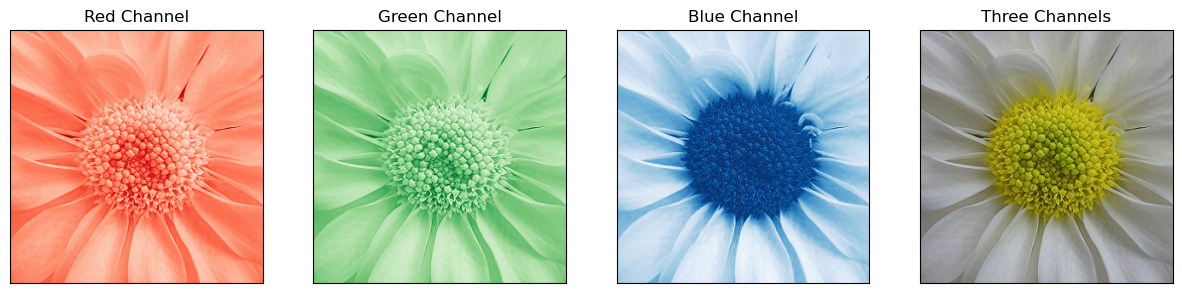

In [ ]:

# Crear un conjunto de ejemplos para visualizar las imágenes
exampleset = ImageFolder(path, transform=transform.Compose([transform.ToTensor(),
                                                            transform.CenterCrop(255),]))

# Obtener un lote de ejemplos
x, y = next(iter(DataLoader(exampleset)))

# Definir nombres y mapas de color para los canales
channels = ['Red', 'Green', 'Blue']
cmaps = [plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

# Crear una figura para visualizar los canales de color
fig, ax = plt.subplots(1, 4, figsize=(15, 10))

# Visualizar cada canal de color
for i, axs in enumerate(fig.axes[:3]):
    axs.imshow(x[0][i, :, :], cmap=cmaps[i])  # Mostrar el canal de color
    axs.set_title(f'{channels[i]} Channel')  # Título del canal
    axs.set_xticks([])  # Quitar marcas en el eje x
    axs.set_yticks([])  # Quitar marcas en el eje y

# Mostrar la imagen con los tres canales de color
ax[3].imshow(x[0].permute(1, 2, 0))  # Cambiar el orden de los ejes
ax[3].set_title('Three Channels')  # Título
ax[3].set_xticks([])  # Quitar marcas en el eje x
ax[3].set_yticks([])  # Quitar marcas en el eje y

In [ ]:
channels = 3  # Número de canales (3 porque la imagen es en formato RGB)

# Bucle para iterar a través de los canales de color (rojo, verde, azul)
for channel in range(channels):
    # Bucle para iterar a través de los conjuntos de datos: 'train', 'val', 'test'
    for x in ['train', 'val', 'test']:
        # Calculamos el número total de píxeles en el conjunto de datos
        # Número de píxeles = número de objetos en el conjunto * tamaño de cada imagen (220*220)
        num_pxl = dataset_sizes[x] * 220 * 220

        # Inicializamos una variable para almacenar la suma total de los píxeles en un canal
        total_sum = 0
        # Recorremos los lotes del DataLoader correspondiente al conjunto actual ('train', 'val', o 'test')
        for batch in loaders[x]:
            # Extraemos el canal correspondiente de cada imagen en el lote
            layer = list(map(itemgetter(channel), batch[0]))
            # Apilamos los tensores de las imágenes en una sola dimensión
            layer = torch.stack(layer, dim=0)
            # Sumamos los valores de todos los píxeles en este canal
            total_sum += layer.sum()
        # Calculamos la media dividiendo la suma total por el número de píxeles
        mean = total_sum / num_pxl

        # Inicializamos una variable para almacenar la suma de los cuadrados de las diferencias respecto a la media
        sum_sqrt = 0
        # Recorremos los lotes de nuevo para calcular la desviación estándar
        for batch in loaders[x]:
            # Extraemos el canal correspondiente de cada imagen en el lote
            layer = list(map(itemgetter(channel), batch[0]))
            # Calculamos la suma de los cuadrados de las diferencias respecto a la media
            sum_sqrt += ((torch.stack(layer, dim=0) - mean).pow(2)).sum()
        # Calculamos la desviación estándar tomando la raíz cuadrada de la suma de cuadrados dividida por el número de píxeles
        std = torch.sqrt(sum_sqrt / num_pxl)

        # Imprimimos los resultados: el canal, el conjunto de datos, la media y la desviación estándar
        print(f'|channel:{channel+1}| {x} - mean: {mean}, std: {std}')


|channel:1| train - mean: -0.08513090014457703, std: 0.9734545946121216
|channel:1| val - mean: -0.07467671483755112, std: 0.9857089519500732
|channel:1| test - mean: 0.11246329545974731, std: 0.8949926495552063
|channel:2| train - mean: -0.056668177247047424, std: 0.9809690117835999
|channel:2| val - mean: -0.05019458010792732, std: 0.9909745454788208
|channel:2| test - mean: 0.16574203968048096, std: 0.8847255110740662
|channel:3| train - mean: -0.024543048813939095, std: 0.9765376448631287
|channel:3| val - mean: -0.020857175812125206, std: 0.9827762246131897
|channel:3| test - mean: 0.13841129839420319, std: 0.969063401222229


In [ ]:
# Obtenemos un lote de imágenes y etiquetas del conjunto de entrenamiento
x, y = next(iter(loaders['train']))

# Calculamos la media y la desviación estándar de las imágenes en el lote
x.mean(),  x.std()

(tensor(-0.0570), tensor(0.9892))

In [ ]:
# Volvemos a obtener un nuevo lote de imágenes y etiquetas del conjunto de entrenamiento
x, y = next(iter(loaders['train']))

# Transformamos la primera imagen del lote de formato tensor (C, H, W) a un formato numpy (H, W, C) para poder visualizarla
img_norm = x[0].permute(1, 2, 0).numpy()

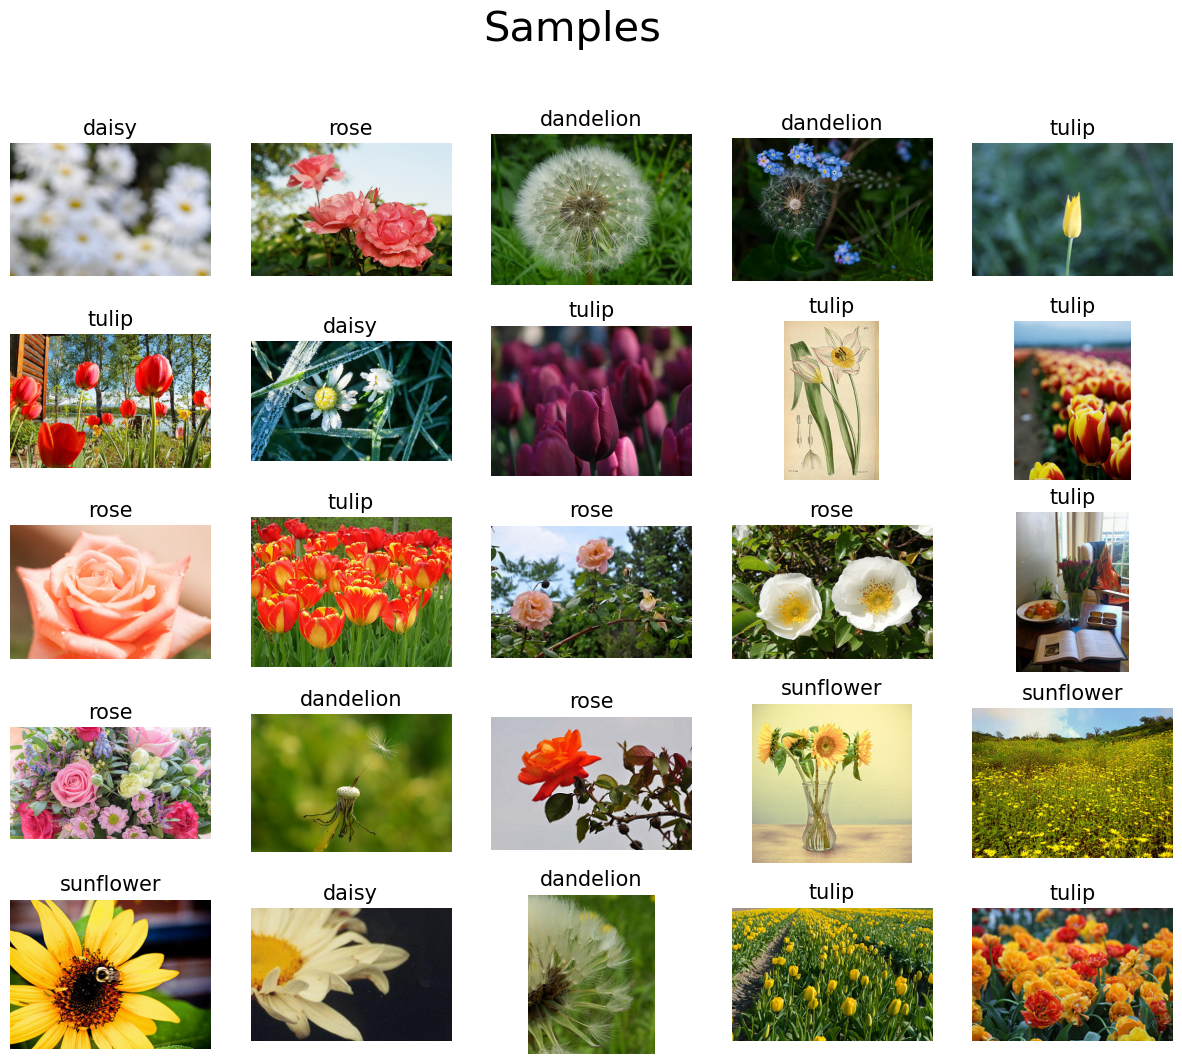

In [ ]:
# Función para graficar muestras aleatorias
def plot_samples(samples):
    # Creamos una cuadrícula de subgráficas de 5x5
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15,12))
    i = 0
    # Recorremos cada celda de la cuadrícula para mostrar las imágenes
    for row in range(5):
        for col in range(5):
            # Leemos la imagen de la ruta proporcionada en las muestras
            img = mpimg.imread(samples[i][0][0])
            # Mostramos la imagen en la subgráfica correspondiente
            ax[row][col].imshow(img)
            ax[row][col].axis('off')  # Quitamos los ejes para una visualización más limpia
            # Establecemos el título como la clase correspondiente
            ax[row][col].set_title(samples[i][1], fontsize=15)
            i += 1

# Seleccionamos aleatoriamente 25 muestras del conjunto de datos original
rand_samples = []
for _ in range(25):
    # Seleccionamos una clase aleatoria
    classes = random.choice(original.classes)
    # Seleccionamos aleatoriamente una imagen de esa clase
    rand_samples.append([random.sample([os.path.join(path+'/'+classes, filename) for filename in os.listdir(path+'/'+classes)], 1), classes])

# Mostramos la primera muestra para ver el formato
rand_samples[0]

# Graficamos las 25 muestras seleccionadas aleatoriamente
plot_samples(rand_samples)

# Agregamos un título general a la figura
plt.suptitle('Samples', fontsize=30)

# Mostramos la figura
plt.show()

In [ ]:
# Función para calcular la precisión
def accuracy(outputs, labels):
    # outputs es un tensor con las predicciones para cada clase. torch.max devuelve el valor máximo y su índice.
    # En este caso, nos interesa el índice (la clase predicha), que guardamos en 'preds'.
    _, preds = torch.max(outputs, dim=1)

    # Comparamos las predicciones con las etiquetas reales y calculamos la precisión dividiendo la cantidad de predicciones
    # correctas por el total de elementos.
    # Retornamos la precisión como tensor y también las predicciones.
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)), preds

# Inicializamos diccionarios para almacenar las pérdidas y precisiones a lo largo del entrenamiento
# Esto nos permitirá graficar y analizar cómo evoluciona el modelo durante el entrenamiento y validación.
losses = {'train': [], 'val': []}
accuracies = {'train': [], 'val': []}

# Lista para almacenar los valores de la tasa de aprendizaje (learning rate) en cada época
# Esto es útil si estás utilizando técnicas como decay o scheduling para ajustar la tasa de aprendizaje.
lr = []


In [ ]:
import time
import torch
import copy
from torch import nn

# Función de entrenamiento con parámetros de early stopping, optimización y ajuste de tasa de aprendizaje
def train(seed, epochs, model, patience=5, min_delta=0.01, early_stop_acc=0.90):

    print('Creating a model {}...'.format(seed))

    model.to(device)  # Mueve el modelo al dispositivo adecuado (GPU o CPU)
    criterion = nn.CrossEntropyLoss()  # Función de pérdida para clasificación multiclase

    # Se configura el optimizador dependiendo del valor de la semilla (seed)
    if seed == 2 or seed == 3:
        optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)
    else:
        optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

    # Scheduler que reduce la tasa de aprendizaje si la métrica no mejora
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)

    since = time.time()  # Marca el inicio del entrenamiento
    best_model = copy.deepcopy(model.state_dict())  # Copia profunda del mejor modelo
    best_acc = 0.0  # Mejores resultados de accuracy
    patience_counter = 0  # Contador para early stopping

    # Bucle principal de entrenamiento por épocas
    for epoch in range(epochs):
        # Fases de entrenamiento y validación
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Establece el modelo en modo entrenamiento
            else:
                model.eval()  # Establece el modelo en modo evaluación

            running_loss = 0.0  # Inicializa el loss acumulado
            running_corrects = 0.0  # Inicializa el conteo de aciertos

            # Itera sobre los lotes de datos
            for inputs, labels in loaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)  # Mueve los datos al dispositivo
                optimizer.zero_grad()  # Reinicia los gradientes

                # Solo calculamos los gradientes durante la fase de entrenamiento
                with torch.set_grad_enabled(phase == 'train'):
                    outp = model(inputs)  # Forward pass
                    _, pred = torch.max(outp, 1)  # Predicción de la clase con mayor probabilidad
                    loss = criterion(outp, labels)  # Calcula la pérdida

                    if phase == 'train':
                        loss.backward()  # Backpropagation
                        optimizer.step()  # Actualización de los pesos

                # Acumula el loss y el número de aciertos
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(pred == labels.data)

            # Calcula el loss y la precisión (accuracy) por cada fase (entrenamiento o validación)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # Ajusta la tasa de aprendizaje en función del accuracy de validación
            if phase == 'train':
                scheduler.step(epoch_acc)

            # Guarda las pérdidas y precisiones para su posterior análisis
            losses[phase].append(epoch_loss)
            accuracies[phase].append(epoch_acc)

            # Imprime estadísticas de cada época
            if phase == 'train':
                print('Epoch: {}/{}'.format(epoch + 1, epochs))
            print('{} - loss: {}, accuracy: {}'.format(phase, epoch_loss, epoch_acc))

            # Comprobación para el early stopping durante la fase de validación
            if phase == 'val':
                print('Time: {}m {}s'.format((time.time() - since) // 60, (time.time() - since) % 60))
                print('==' * 31)

                # Si la precisión mejora, guarda el mejor modelo
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model = copy.deepcopy(model.state_dict())
                    patience_counter = 0  # Reinicia el contador si hay mejora
                else:
                    patience_counter += 1  # Incrementa el contador si no hay mejora

                # Verifica si se ha alcanzado el criterio de early stopping
                if best_acc >= early_stop_acc or patience_counter >= patience:
                    print(f'Early stopping at epoch {epoch+1} with best accuracy: {best_acc}')
                    model.load_state_dict(best_model)  # Carga el mejor modelo
                    return model

    time_elapsed = time.time() - since  # Calcula el tiempo total de entrenamiento
    print('TRAINING COMPLETE IN {}m {}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Val Accuracy: {}'.format(best_acc))

    # Carga el mejor modelo antes de devolverlo
    model.load_state_dict(best_model)
    return model


In [ ]:
densenet121_1 = torchvision.models.densenet121(pretrained=True)
for param in densenet121_1.parameters():
  param.requires_grad=False

densenet121_1.classifier = nn.Linear(in_features=densenet121_1.classifier.in_features, out_features=len(original.classes), bias=True)

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Ahora ejecutamos el bucle de entrenamiento
num_models = 1  # Número de modelos a entrenar (en este caso, solo uno)
epochs = 5  # Número de épocas para entrenar el modelo

models = [densenet121_1]  # Lista que contiene los modelos a entrenar (en este caso, DenseNet121)

# Bucle que recorre cada modelo por su semilla (identificador) y entrena
for seed in range(num_models):
    # Llamamos a la función 'train' que entrenará el modelo especificado
    train(seed=seed, epochs=epochs, model=models[seed])


Creating a model 0...
Epoch: 1/5
train - loss: 0.5769394488666695, accuracy: 0.8097947571631782
val - loss: 0.4102328466177713, accuracy: 0.8519195612431445
Time: 1.0m 21.091471433639526s
Epoch: 2/5
train - loss: 0.3594086555064972, accuracy: 0.8776671408250356
val - loss: 0.36361452038152997, accuracy: 0.8653260207190738
Time: 2.0m 43.24515390396118s
Epoch: 3/5
train - loss: 0.3173877386868198, accuracy: 0.8915532073426811
val - loss: 0.34513193486958726, accuracy: 0.8744667885435711
Time: 4.0m 5.670198440551758s
Epoch: 4/5
train - loss: 0.2943562591973419, accuracy: 0.8988010566957936
val - loss: 0.33553153806746844, accuracy: 0.8793418647166362
Time: 5.0m 29.447359323501587s
Epoch: 5/5
train - loss: 0.27897999458525197, accuracy: 0.9038813249339566
val - loss: 0.3299258527851628, accuracy: 0.8817794028031688
Time: 6.0m 52.843231201171875s
TRAINING COMPLETE IN 6.0m 52.93592953681946s
Best Val Accuracy: 0.8817794028031688


In [ ]:
# Definimos una clase para el ensamble de modelos
class Ensemble(nn.Module):
    def __init__(self, device):
        super(Ensemble, self).__init__()
        # nn.ModuleList es utilizada para que el optimizador pueda detectar los parámetros de los modelos
        self.models = nn.ModuleList(models)  # Lista de modelos para el ensamble

    # Definimos la operación forward, que suma las salidas de cada modelo del ensamble
    def forward(self, x):
        # Inicializamos un tensor de ceros con el tamaño de las clases y lo enviamos al dispositivo (GPU/CPU)
        output = torch.zeros([x.size(0), len(original.classes)]).to(device)

        # Hacemos un loop por cada modelo del ensamble, aplicamos forward y sumamos sus salidas
        for model in self.models:
            output += model(x)

        # Devolvemos la suma de las salidas de todos los modelos
        return output


In [ ]:
# Instanciamos el modelo de ensamble
model = Ensemble(device)

In [ ]:
# Función para validar el modelo durante la evaluación
def validation_step(batch):
    images, labels = batch  # Obtenemos las imágenes y etiquetas del batch
    images, labels = images.to(device), labels.to(device)  # Movemos los datos al dispositivo (GPU/CPU)

    out = model(images)  # Realizamos la predicción utilizando el modelo ensamble
    loss = F.cross_entropy(out, labels)  # Calculamos la pérdida utilizando cross-entropy
    acc, preds = accuracy(out, labels)  # Calculamos la precisión (accuracy) y las predicciones

    # Devolvemos un diccionario con la pérdida, precisión y predicciones
    return {'val_loss': loss.detach(), 'val_acc': acc.detach(),
            'preds': preds.detach(), 'labels': labels.detach()}


In [ ]:
# Función para calcular las métricas de evaluación al final de la validación o test
def test_prediction(outputs):
    # Extraemos las pérdidas de cada batch y calculamos la media
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()

    # Extraemos las precisiones de cada batch y calculamos la media
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()

    # Combinamos todas las predicciones de los diferentes batches en una lista
    batch_preds = [pred for x in outputs for pred in x['preds'].tolist()]

    # Combinamos todas las etiquetas verdaderas en una lista
    batch_labels = [lab for x in outputs for lab in x['labels'].tolist()]

    # Devolvemos un diccionario con las métricas finales: pérdida, precisión, predicciones y etiquetas verdaderas
    return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item(),
            'test_preds': batch_preds, 'test_labels': batch_labels}

In [ ]:
# Esta función realiza las predicciones en el conjunto de prueba sin calcular gradientes (no es necesario para la predicción)
@torch.no_grad()
def test_predict(model, test_loader):
    model.eval()  # Cambia el modelo al modo de evaluación (desactiva el dropout, batchnorm, etc.)

    # Ejecutamos la validación en cada batch del conjunto de prueba
    outputs = [validation_step(batch) for batch in test_loader]

    # Obtenemos los resultados de la predicción (pérdida y precisión)
    results = test_prediction(outputs)

    # Imprimimos las métricas finales
    print('test_loss: {:.4f}, test_acc: {:.4f}'
          .format(results['test_loss'], results['test_acc']))

    # Devolvemos las predicciones y las etiquetas reales
    return results['test_preds'], results['test_labels']

In [ ]:
# Movemos el modelo al dispositivo (GPU/CPU)
model.to(device)

# Realizamos las predicciones en el conjunto de prueba
preds, labels = test_predict(model, loaders['test'])

test_loss: 0.2677, test_acc: 0.8998


In [ ]:
# Función para normalizar las imágenes después de invertir la normalización aplicada durante el preprocesamiento
def norm_out(img):
    # Permutamos las dimensiones de la imagen de (C, H, W) a (H, W, C) para poder mostrarla con matplotlib
    img = img.permute(1, 2, 0)

    # Media y desviación estándar utilizadas para normalizar las imágenes durante el entrenamiento
    mean = torch.FloatTensor([0.4124234616756439, 0.3674212694168091, 0.2578217089176178])
    std = torch.FloatTensor([0.3268945515155792, 0.29282665252685547, 0.29053378105163574])

    # Desnormalizamos la imagen (invirtiendo la normalización)
    img = img * std + mean

    # Aseguramos que los valores de la imagen estén entre 0 y 1
    return np.clip(img, 0, 1)

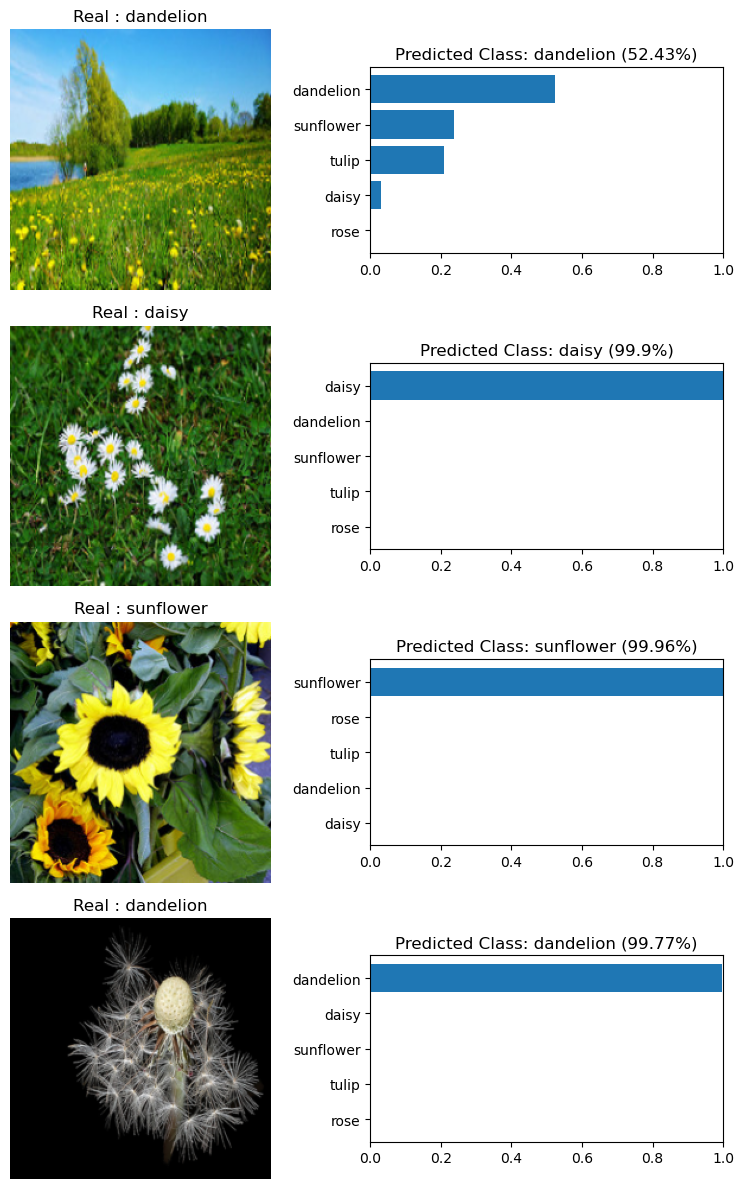

In [ ]:
# Creamos una figura con subplots de 4 filas y 2 columnas para visualizar 4 imágenes con sus predicciones
fig, ax = plt.subplots(figsize=(8, 12), ncols=2, nrows=4)

# Iteramos para mostrar 4 ejemplos aleatorios del conjunto de prueba
for row in range(4):
    # Seleccionamos un índice aleatorio de los datos de prueba
    i = np.random.randint(0, high=len(test))
    img, label = test[i]  # Obtenemos la imagen y la etiqueta correspondiente

    # Calculamos las probabilidades utilizando Softmax
    m = nn.Softmax(dim=1)
    percent = m(model(img.to(device).unsqueeze(0)))  # Hacemos la predicción y calculamos las probabilidades

    # Ordenamos las probabilidades y los índices de las clases para obtener las 5 mejores predicciones
    predmax3percent = torch.sort(percent[0])[0]
    predmax3inds = torch.sort(percent[0])[1]

    # Obtenemos los nombres de las clases correspondientes a las 5 predicciones con mayor probabilidad
    classes = np.array([original.classes[predmax3inds[-5]],
                        original.classes[predmax3inds[-4]],
                        original.classes[predmax3inds[-3]],
                        original.classes[predmax3inds[-2]],
                        original.classes[predmax3inds[-1]]])
    class_name = original.classes  # Nombres de las clases

    # Mostramos la imagen original en el subplot de la izquierda
    ax[row][0].imshow(norm_out(img))
    ax[row][0].set_title('Real : {}'.format(class_name[label]))  # Título: Clase real
    ax[row][0].axis('off')  # Ocultamos los ejes

    # Dibujamos un gráfico de barras con las probabilidades de las 5 predicciones más altas en el subplot de la derecha
    ax[row][1].barh(classes, predmax3percent.detach().cpu().numpy())  # Probabilidades de las clases
    ax[row][1].set_aspect(0.1)
    ax[row][1].set_yticks(classes)  # Establecemos las etiquetas de las barras
    ax[row][1].set_title('Predicted Class: {} ({}%)'.format(original.classes[predmax3inds[-1]],
                                                            round((predmax3percent[-1]*100).item(), 2)))  # Título: Clase predicha
    ax[row][1].set_xlim(0, 1.)  # Establecemos el rango del eje X para las probabilidades

# Ajustamos el layout para evitar solapamientos entre gráficos
plt.tight_layout()

In [ ]:
# Genera un informe de clasificación detallado utilizando las etiquetas y predicciones
report = classification_report(labels, preds,
                               output_dict=True,  # Devuelve el informe como un diccionario
                               target_names=original.classes)  # Nombres de las clases

# Convierte el diccionario del informe en un DataFrame de pandas
report_df = pd.DataFrame(report).transpose()

In [ ]:
# Configura pandas para mostrar hasta 134 filas al imprimir el DataFrame
pd.set_option("display.max_rows", None)

# Muestra las primeras 134 filas del DataFrame del informe
report_df.head(134)

precision    recall  f1-score    support
daisy          0.953488  0.897810  0.924812  137.00000
dandelion      0.919149  0.955752  0.937093  226.00000
rose           0.900826  0.762238  0.825758  143.00000
sunflower      0.903846  0.959184  0.930693  147.00000
tulip          0.852018  0.900474  0.875576  211.00000
accuracy       0.901620  0.901620  0.901620    0.90162
macro avg      0.905866  0.895092  0.898786  864.00000
weighted avg   0.902564  0.901620  0.900607  864.00000

<Figure size 640x480 with 0 Axes>

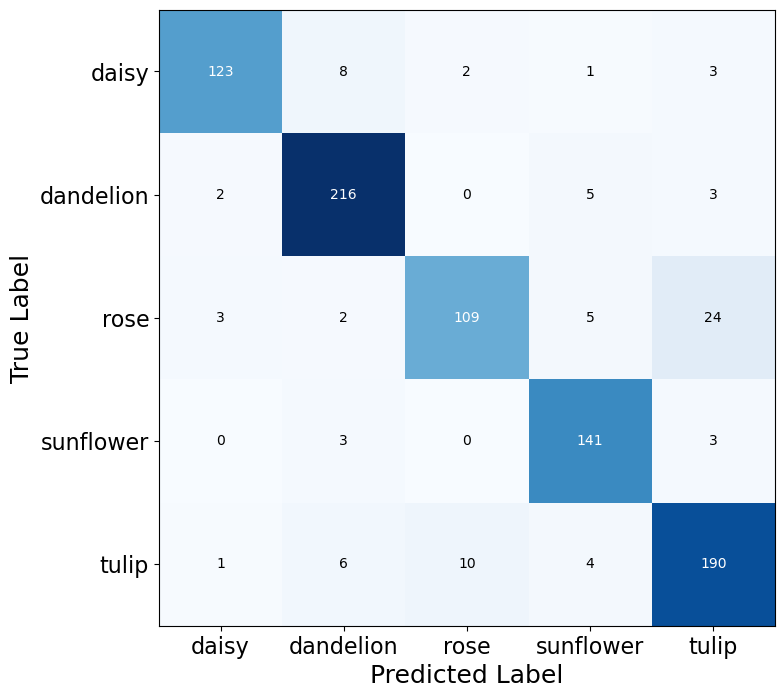

In [ ]:
# Calcula la matriz de confusión utilizando las etiquetas verdaderas y las predicciones del modelo
cm = confusion_matrix(labels, preds)

# Crea una figura para la matriz de confusión
plt.figure()

# Llama a la función para plotear la matriz de confusión
plot_confusion_matrix(cm, figsize=(12, 8), cmap=plt.cm.Blues)

# Configura las etiquetas del eje x con los nombres de las clases
plt.xticks(range(len(original.classes)), original.classes, fontsize=16)
# Configura las etiquetas del eje y con los nombres de las clases
plt.yticks(range(len(original.classes)), original.classes, fontsize=16)

# Etiqueta el eje x
plt.xlabel('Predicted Label', fontsize=18)
# Etiqueta el eje y
plt.ylabel('True Label', fontsize=18)

# Muestra la figura
plt.show()
